Importing useful librairies

In [1]:
import pandas as pd
import numpy as np
import collections
import plotly.plotly as py
import plotly.graph_objs as go
from operator import truediv
import os

from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt  
% matplotlib inline
import random

from datetime import datetime
from wordcloud import WordCloud
import pycountry
import seaborn as sns

from PIL import Image
import scipy
from matplotlib import cm



Importing the csv containing all the events

In [2]:
total_events= pd.read_csv('FinalResults/total_eventsFinal.csv')
total_events.count()

Artist       204815
Date         204815
Venue        204792
genre        127392
origin        62381
City         204783
Latitude     204213
Longitude    204213
dtype: int64

Defining function to plot pie charts

In [3]:
def plot_pie_chart(df,name,title,angle,city,colors):
    if (city!=0):
        df=df.loc[df['City'] == city]


    total=df.count()['Artist']
    defined=df.count()[name]/total*100
    undefined=100-defined
 
    # Data to plot
    labels = 'Defined', 'Undefined'
    sizes = [defined, undefined,]
    colors = colors
    explode = (0, 0, )  # explode 1st slice
 
    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%',  startangle=angle)
 
    plt.axis('equal')
    plt.suptitle(title, fontsize=20)


    plt.show()

### Analysing the number of rows where genre or origin is defined under different condition

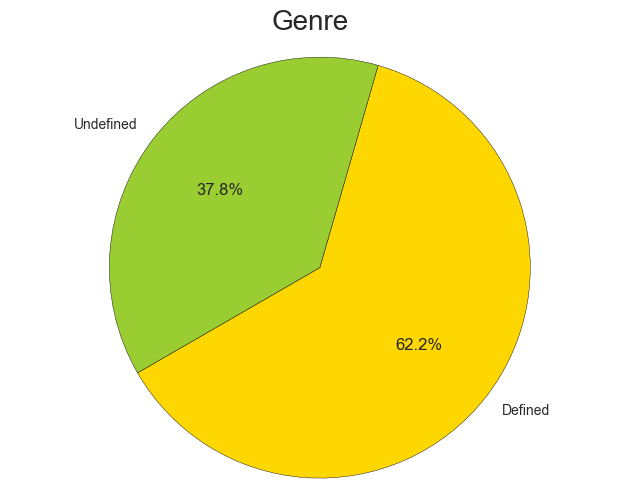

In [4]:
plot_pie_chart(total_events, 'genre', 'Genre',210,0,['gold', 'yellowgreen'])

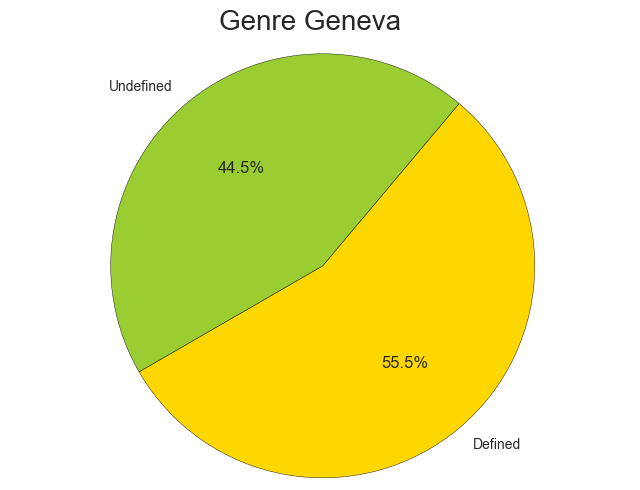

In [5]:
plot_pie_chart(total_events, 'genre', 'Genre Geneva',210,'Geneva',['gold', 'yellowgreen'])

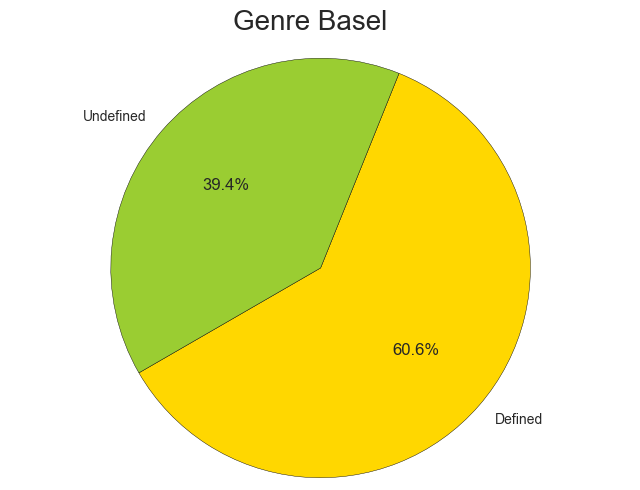

In [6]:
plot_pie_chart(total_events, 'genre', 'Genre Basel',210,'Basel',['gold', 'yellowgreen'])

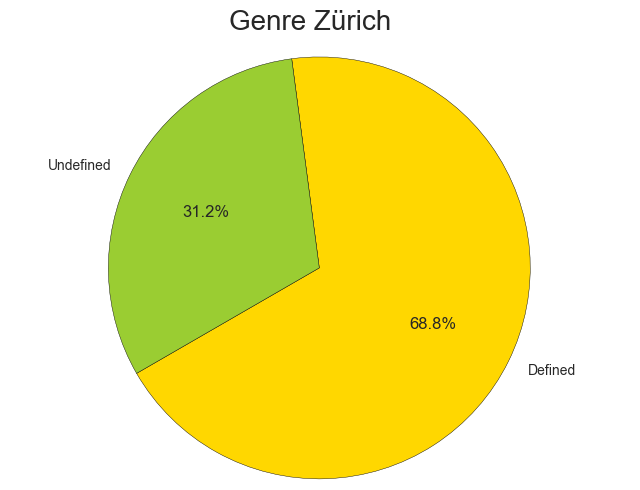

In [7]:
plot_pie_chart(total_events, 'genre', 'Genre Zürich',210,'Zürich',['gold', 'yellowgreen'])

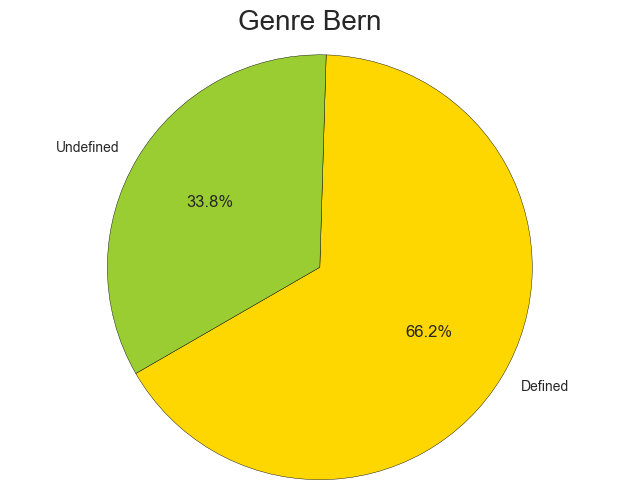

In [8]:
plot_pie_chart(total_events, 'genre', 'Genre Bern',210,'Bern',['gold', 'yellowgreen'])

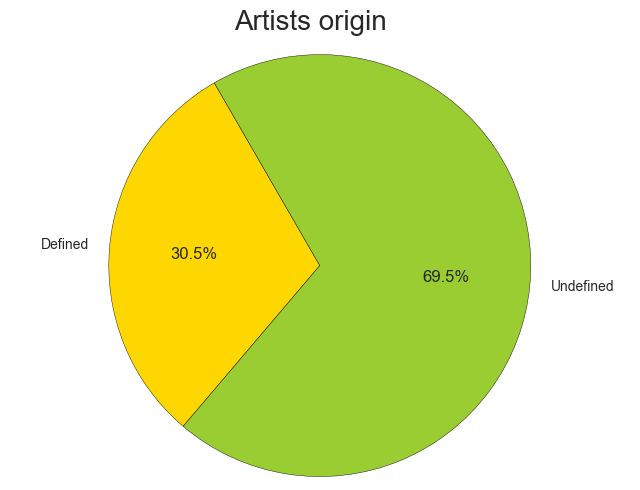

In [9]:
plot_pie_chart(total_events, 'origin', 'Artists origin',120,0,['gold', 'yellowgreen'])

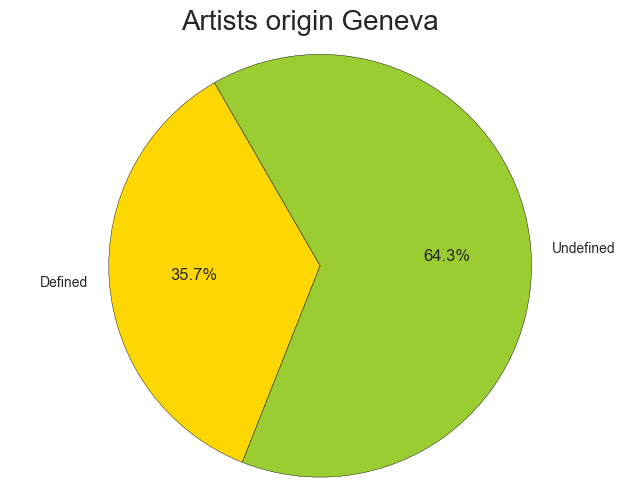

In [10]:
plot_pie_chart(total_events, 'origin', 'Artists origin Geneva',120,'Geneva',['gold', 'yellowgreen'])

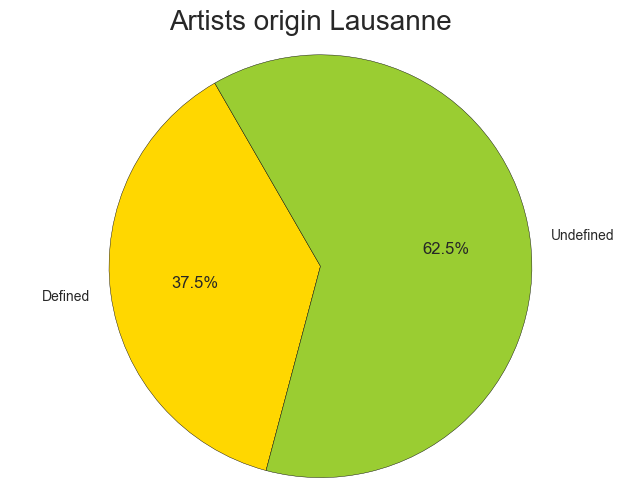

In [11]:
plot_pie_chart(total_events, 'origin', 'Artists origin Lausanne',120,'Lausanne',['gold', 'yellowgreen'])

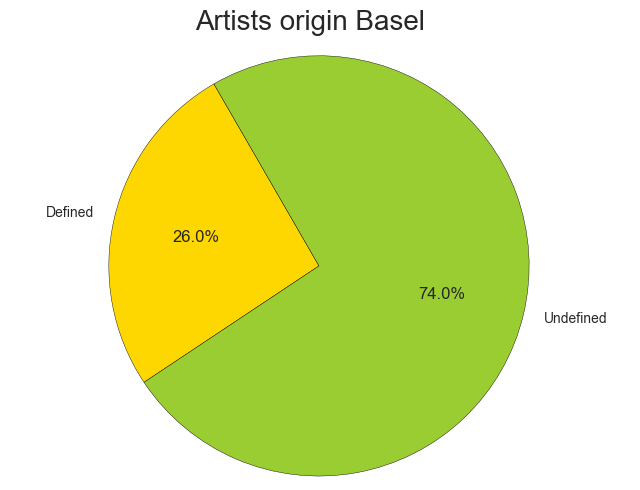

In [12]:
plot_pie_chart(total_events, 'origin', 'Artists origin Basel',120,'Basel',['gold', 'yellowgreen'])

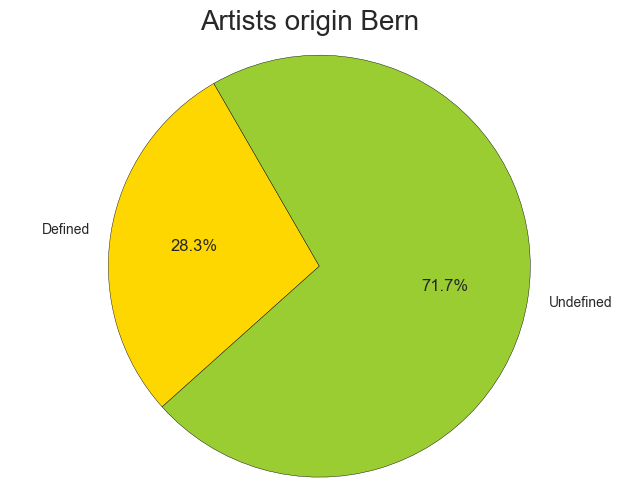

In [13]:
plot_pie_chart(total_events, 'origin', 'Artists origin Bern',120,'Bern',['gold', 'yellowgreen'])

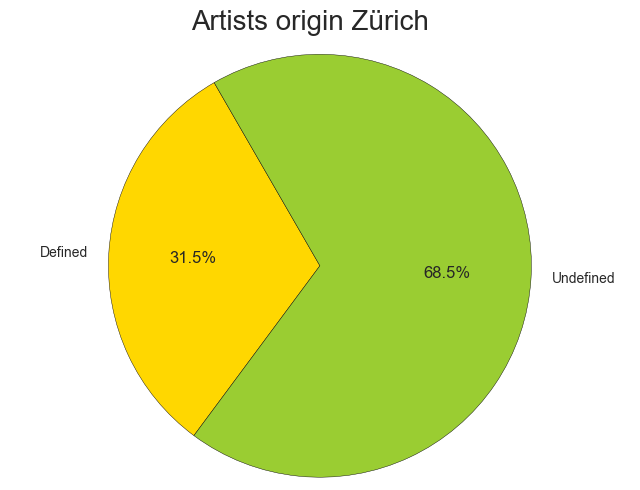

In [14]:
plot_pie_chart(total_events, 'origin', 'Artists origin Zürich',120,'Zürich',['gold', 'yellowgreen'])

### Percentage of events in the 5 cities that hosted the greatest number of concert

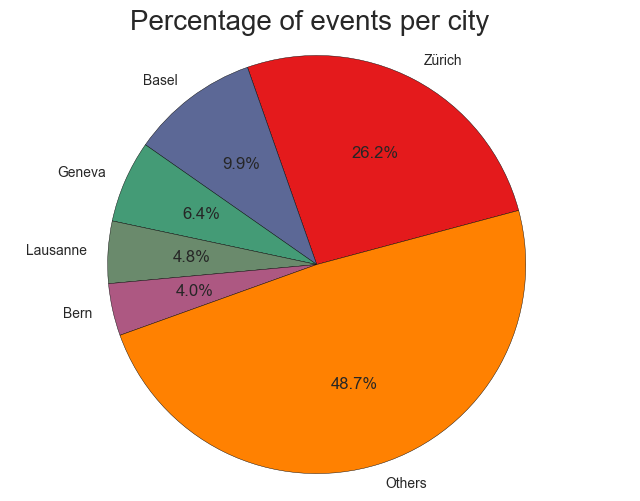

In [15]:
cities=total_events['City']
results_city=cities.value_counts()
total=sum(results_city)
zurich=results_city['Zürich']/total*100
basel=results_city['Basel']/total*100
geneva=results_city['Geneva']/total*100
lausanne=results_city['Lausanne']/total*100
bern=results_city['Bern']/total*100
others=100-zurich-basel-geneva-lausanne-bern

a=np.random.random(10)
cs=cm.Set1(np.arange(10)/10.)

    # Data to plot
labels = 'Zürich', 'Basel','Geneva','Lausanne','Bern','Others'
sizes = [zurich,basel,geneva,lausanne,bern,others]

 
    # Plot
plt.pie(sizes, labels=labels,autopct='%1.1f%%',colors=cs,  startangle=15)
 
plt.axis('equal')
plt.suptitle('Percentage of events per city', fontsize=20)


plt.show()





## 5 Artists that played the greatest number of times

In [16]:
artists=total_events['Artist']
c=artists.value_counts()[0:10]
c.axes[0]
c.values

array([347, 345, 331, 288, 283, 273, 267, 260, 254, 243])

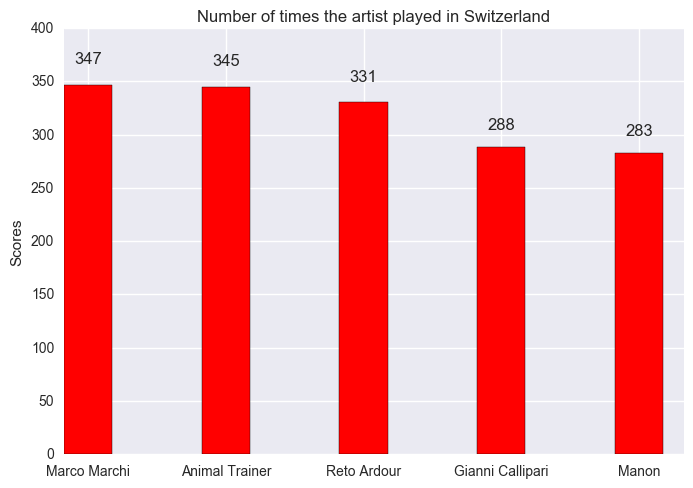

In [17]:

import numpy as np
import matplotlib.pyplot as plt

N = 5
men_means = (347, 345, 331, 288, 283)

ind = np.arange(N)  # the x locations for the groups
width = 0.35      # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='r')


# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Number of times the artist played in Switzerland')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Marco Marchi', 'Animal Trainer', 'Reto Ardour',
       'Gianni Callipari', 'Manon'),fontsize=10)
plt.ylim(0, 400)



def autolabel(rects):

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

## 10 Places that hosted the greatest number of concerts

In [18]:
venue=total_events['Venue']
venue.value_counts()[0:10]

#sum(venue.value_counts())

Hive club       7307
Nordstern       3659
Moods           2796
Zukunft         2707
Friedas buxe    1980
Zoo             1839
Hinterhof       1835
Kaufleuten      1668
Borderline      1653
Mad Club        1627
Name: Venue, dtype: int64

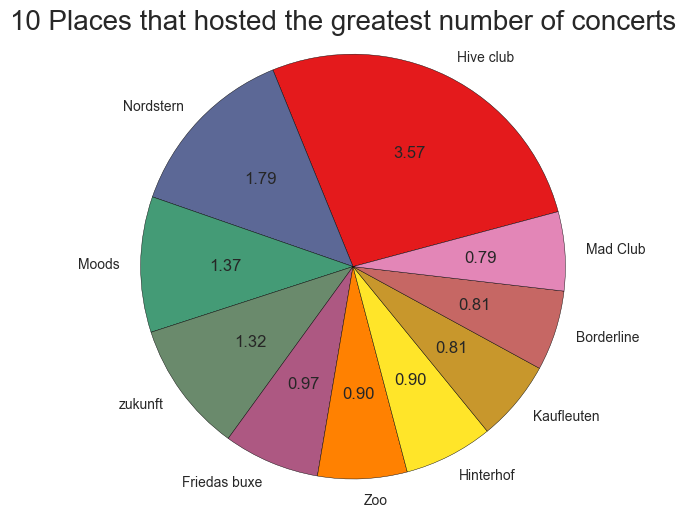

In [19]:
results_venue=venue.value_counts()
total=sum(results_venue)
hive=results_venue['Hive club']/total*100
nordstern=results_venue['Nordstern']/total*100
moods=results_venue['Moods']/total*100
zukunft=results_venue['Zukunft']/total*100
frideas=results_venue['Friedas buxe']/total*100
zoo=results_venue['Zoo']/total*100
hinterhof=results_venue['Hinterhof']/total*100
kaugleuten=results_venue['Kaufleuten']/total*100
borderline=results_venue['Borderline']/total*100
mad=results_venue['Mad Club']/total*100


    # Data to plot
labels = 'Hive club', 'Nordstern','Moods','zukunft','Friedas buxe','Zoo','Hinterhof','Kaufleuten','Borderline','Mad Club'
sizes = [hive,nordstern,moods,zukunft,frideas,zoo,hinterhof,kaugleuten,borderline,mad]
total = sum(sizes)

 
    # Plot
plt.pie(sizes,colors=cs, labels=labels,autopct=lambda p: '{:.2f}'.format(p * total / 100),  startangle=15)
 
plt.axis('equal')
plt.suptitle('10 Places that hosted the greatest number of concerts', fontsize=20)


plt.show()

# Analysis between German and French part

We will consider in our analysis only the big cities: Geneva and Lausanne in the french part and Basel, Zürich in the german one. We will focus on the percentage of artists that come from Germany, France and Italy. And the genre of the artist's playing

In [20]:
geneva=total_events.loc[total_events['City'] == 'Geneva']
lausanne=total_events.loc[total_events['City'] == 'Lausanne']
french_part = pd.concat([geneva, lausanne])


In [21]:
basel=total_events.loc[total_events['City'] == 'Basel']
zurich=total_events.loc[total_events['City'] == 'Zurich']
german_part = pd.concat([basel, zurich])


### Artists that come from Germany, France and Italy

In [22]:
french_origin=french_part['origin']
german_origin=german_part['origin']
french_origin_counted=french_origin.value_counts()
german_origin_counted=german_origin.value_counts()

french_part_france=french_origin_counted['France']
french_part_germany=french_origin_counted['Germany']
french_part_italy=french_origin_counted['Italy']
total_french=french_part_france+french_part_germany+french_part_italy

german_part_france=german_origin_counted['France']
german_part_germany=german_origin_counted['Germany']
german_part_italy=german_origin_counted['Italy']
total_german=german_part_france+german_part_germany+german_part_italy

german_part_france=german_part_france/total_german
german_part_germany=german_part_germany/total_german
german_part_italy=german_part_italy/total_german

french_part_france=french_part_france/total_french
french_part_germany=french_part_germany/total_french
french_part_italy=french_part_italy/total_french


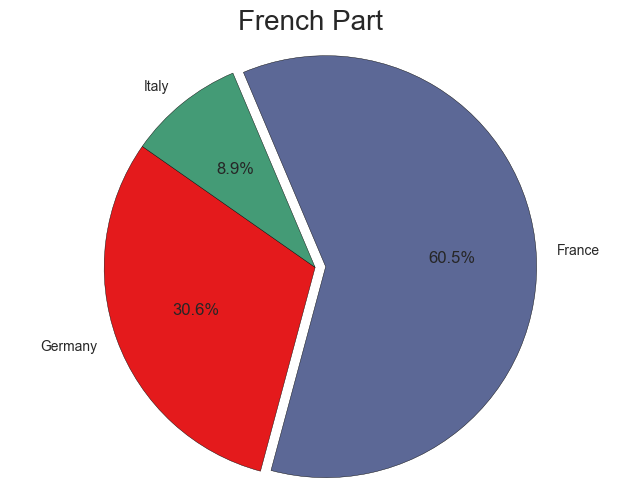

In [23]:
    # Data to plot
labels = 'Germany', 'France','Italy'
sizes = [french_part_germany,french_part_france,french_part_italy]
total = sum(sizes)
explode = (0, 0.05, 0)  # explode 1st slice


 
    # Plot
plt.pie(sizes,colors=cs,explode=explode, labels=labels,autopct='%1.1f%%',  startangle=145)
 
plt.axis('equal')
plt.suptitle('French Part', fontsize=20)


plt.show()

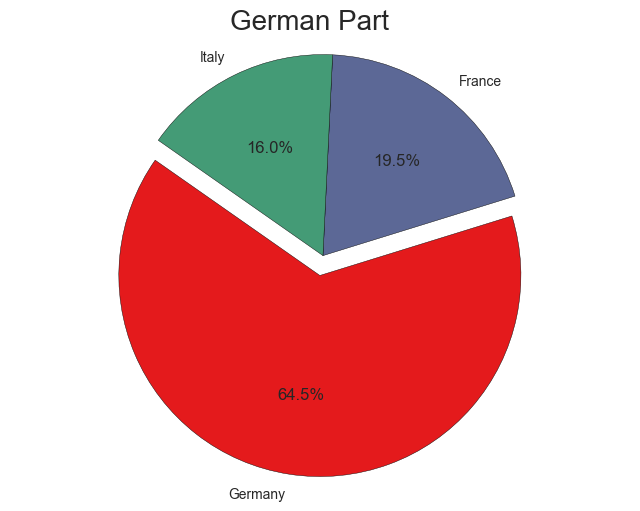

In [24]:
    # Data to plot
labels = 'Germany', 'France','Italy'
sizes = [german_part_germany,german_part_france,german_part_italy]
total = sum(sizes)
explode = (0.1, 0, 0)  # explode 1st slice


 
    # Plot
plt.pie(sizes,colors=cs,explode=explode, labels=labels,autopct='%1.1f%%',  startangle=145)
 
plt.axis('equal')
plt.suptitle('German Part', fontsize=20)


plt.show()

### Genre in each part

In [25]:
french_genre=french_part['genre']
german_genre=german_part['genre']
total_french=sum(french_genre.value_counts())
total_german=sum(german_genre.value_counts())

In [26]:
french_genre_counted=french_genre.value_counts()



In [27]:
german_genre_counted=german_genre.value_counts()

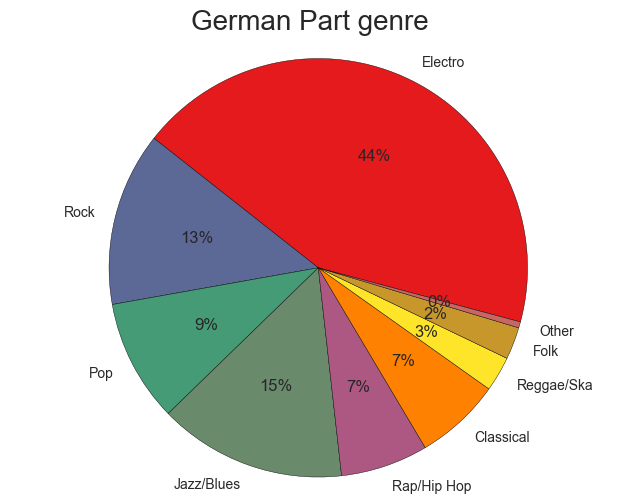

In [28]:
electro_german=german_genre_counted['Electro']/total_german
rock_german=german_genre_counted['Rock']/total_german
pop_german=german_genre_counted['Pop']/total_german
jazz_german=german_genre_counted['Jazz/Blues']/total_german
rap_german=german_genre_counted['Rap/Hip Hop']/total_german
classical_german=german_genre_counted['Classical']/total_german
reggae_german=german_genre_counted['Reggae/Ska']/total_german
folk_german=german_genre_counted['Folk']/total_german
other_german=german_genre_counted['Other']/total_german


    # Data to plot
labels = 'Electro','Rock','Pop','Jazz/Blues','Rap/Hip Hop','Classical','Reggae/Ska','Folk','Other'
sizes = [electro_german,rock_german,pop_german,jazz_german,rap_german,classical_german,reggae_german,folk_german,other_german]
total = sum(sizes)


 
    # Plot
plt.pie(sizes,colors=cs, labels=labels,autopct='%1.0f%%',  startangle=345)
 
plt.axis('equal')
plt.suptitle('German Part genre', fontsize=20)


plt.show()

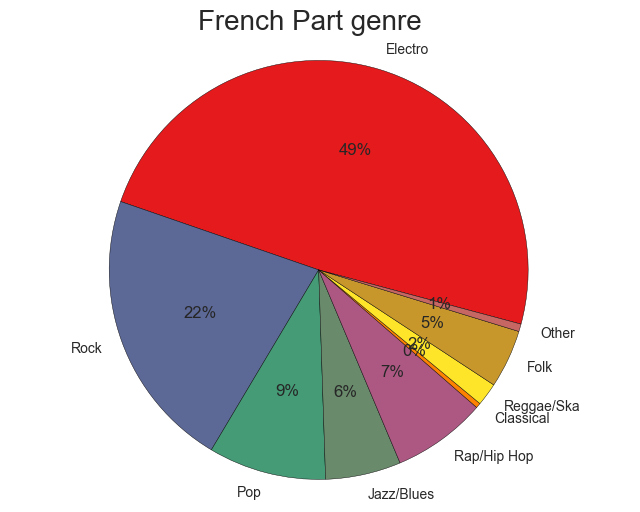

In [29]:
electro_french=french_genre_counted['Electro']/total_french
rock_french=french_genre_counted['Rock']/total_french
pop_french=french_genre_counted['Pop']/total_french
jazz_french=french_genre_counted['Jazz/Blues']/total_french
rap_french=french_genre_counted['Rap/Hip Hop']/total_french
classical_french=french_genre_counted['Classical']/total_french
reggae_french=french_genre_counted['Reggae/Ska']/total_french
folk_french=french_genre_counted['Folk']/total_french
other_french=french_genre_counted['Other']/total_french

    # Data to plot
labels = 'Electro','Rock','Pop','Jazz/Blues','Rap/Hip Hop','Classical','Reggae/Ska','Folk','Other'
sizes1 = [electro_french,rock_french,pop_french,jazz_french,rap_french,classical_french,reggae_french,folk_french,other_french]
total = sum(sizes)

 
    # Plot
plt.pie(sizes1,colors=cs, labels=labels,autopct='%1.0f%%',  startangle=345)
 
plt.axis('equal')
plt.suptitle('French Part genre', fontsize=20)


plt.show()


Now we will test if the genres are significantly different between the french and the german part

In [30]:
x=sizes
y=sizes1
scipy.stats.wilcoxon(x, y=y, zero_method='wilcox', correction=False)

/Users/Charlotte/anaconda/lib/python3.5/site-packages/scipy/stats/morestats.py:2388: UserWarning:




WilcoxonResult(statistic=22.0, pvalue=0.95276502199075286)

As we can see our samples of genre's percentage is too small for the wilocoxon test as it assumes normal distribution but our resultate shows that the two dataset of percentage are different with an alpha of 10%